# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# PIPELINE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [2]:
df= pd.read_csv('../data/processed/datos_normalizados.csv', delimiter=',')

df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s17,s18,s19,s20,s21,failure_cycle,is_failure_cycle,RUL,label1,label2
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.333333,0.0,0.0,0.713178,0.724662,112,0,191.0,0,0
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.333333,0.0,0.0,0.666667,0.731014,112,0,190.0,0,0
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.166667,0.0,0.0,0.627907,0.621375,112,0,189.0,0,0
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.333333,0.0,0.0,0.573643,0.662386,112,0,188.0,0,0
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.416667,0.0,0.0,0.589147,0.704502,112,0,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.750000,0.0,0.0,0.271318,0.109500,20,0,4.0,1,2
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.583333,0.0,0.0,0.124031,0.366197,20,0,3.0,1,2
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.833333,0.0,0.0,0.232558,0.053991,20,0,2.0,1,2
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.583333,0.0,0.0,0.116279,0.234466,20,0,1.0,1,2


# BALANCEO DE LOS DATOS POSIBLE TARGET

In [3]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

In [4]:
cols_a_borrar = ['setting1', 'setting2', 'setting3', 's1','s5','s6','s10','s16', 's18', 's19', 'failure_cycle','is_failure_cycle']
df_red = df.drop(columns=cols_a_borrar)
df_red

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [5]:
df_red['cumcount'] = df_red.groupby('id').cumcount()
df_filtered = df_red[df_red['cumcount'] >= df_red['cumcount'].max() * 0.3]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
109,1,110,0.403614,0.413560,0.321067,0.681159,0.348485,0.133133,0.416667,0.707889,0.352941,0.140469,0.534436,0.416667,0.713178,0.553576,82.0,0,0
110,1,111,0.439759,0.290822,0.436529,0.586151,0.333333,0.134210,0.458333,0.605544,0.382353,0.167510,0.460947,0.333333,0.604651,0.440900,81.0,0,0
111,1,112,0.436747,0.336167,0.330689,0.537842,0.242424,0.132594,0.220238,0.684435,0.294118,0.162968,0.460177,0.500000,0.542636,0.588926,80.0,0,0
112,1,113,0.442771,0.431873,0.410871,0.492754,0.303030,0.140985,0.363095,0.652452,0.411765,0.151615,0.512120,0.416667,0.589147,0.574289,79.0,0,0
113,1,114,0.331325,0.378897,0.349764,0.714976,0.257576,0.111505,0.434524,0.637527,0.397059,0.167303,0.400539,0.500000,0.581395,0.664457,78.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [6]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    6654
2    1600
1    1477
Name: count, dtype: int64

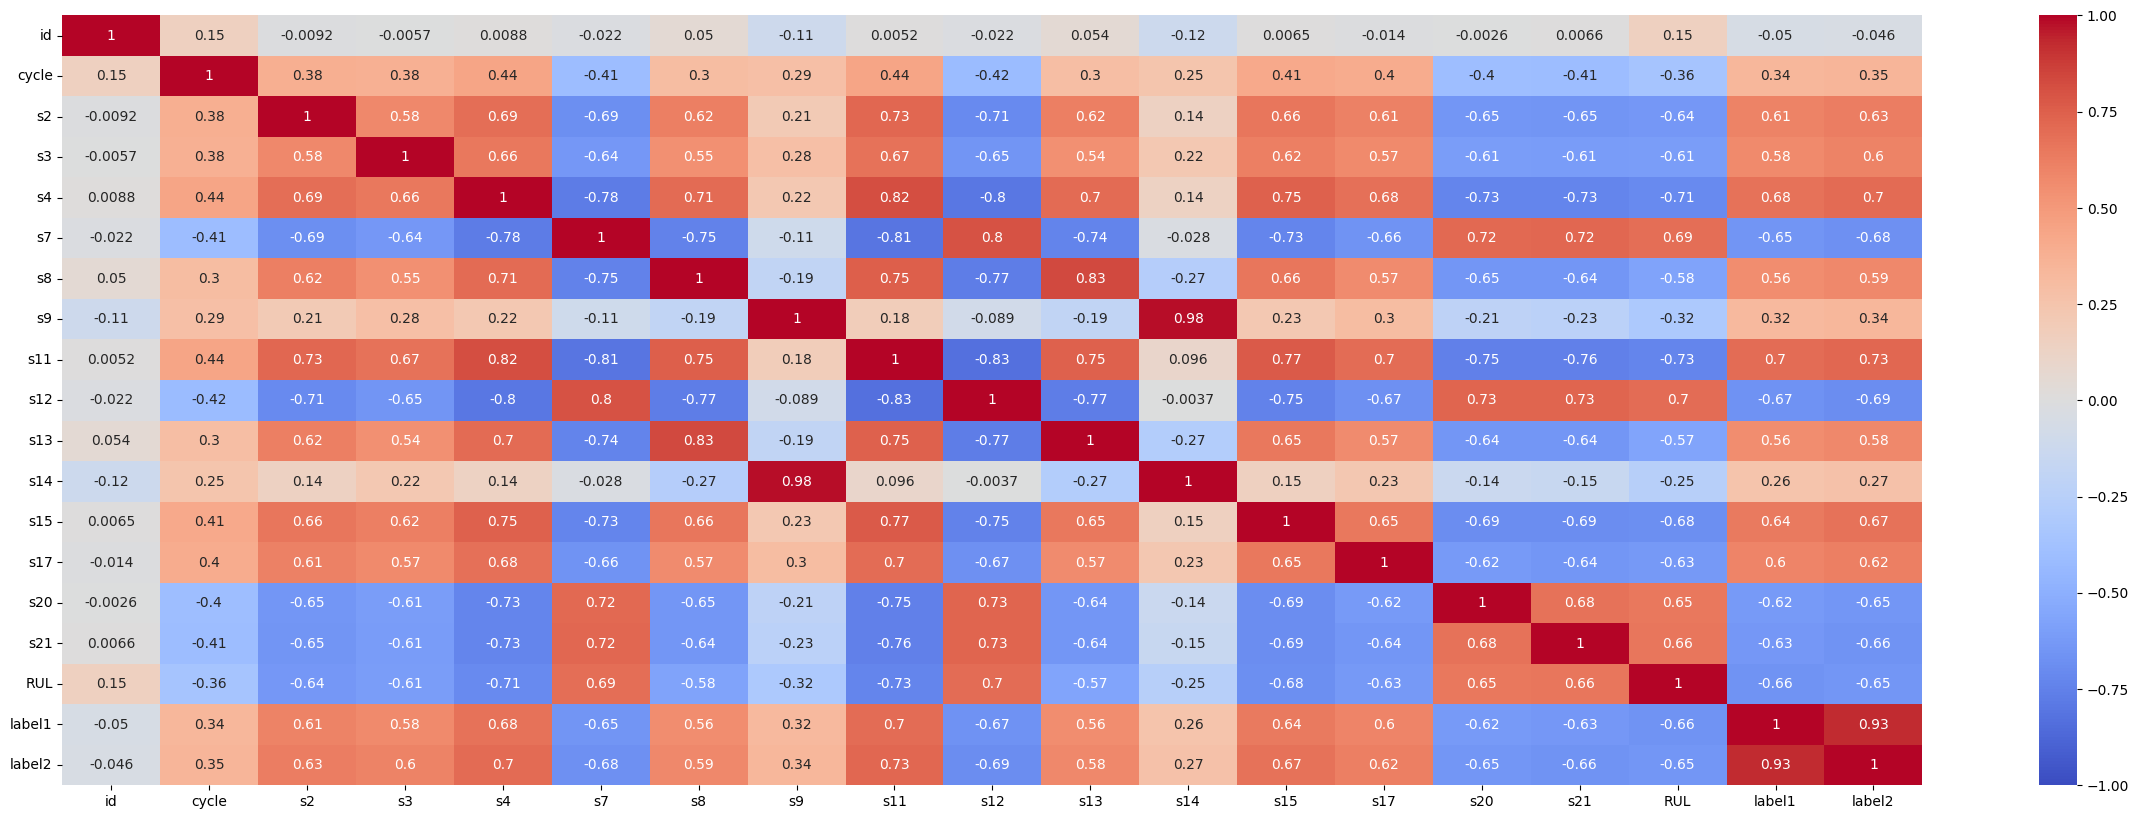

In [7]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [8]:
X = df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2', 'RUL'])
y = df_filtered['label2']

In [9]:
X

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
109,0.403614,0.413560,0.321067,0.681159,0.348485,0.133133,0.416667,0.707889,0.352941,0.140469,0.534436,0.416667,0.713178,0.553576
110,0.439759,0.290822,0.436529,0.586151,0.333333,0.134210,0.458333,0.605544,0.382353,0.167510,0.460947,0.333333,0.604651,0.440900
111,0.436747,0.336167,0.330689,0.537842,0.242424,0.132594,0.220238,0.684435,0.294118,0.162968,0.460177,0.500000,0.542636,0.588926
112,0.442771,0.431873,0.410871,0.492754,0.303030,0.140985,0.363095,0.652452,0.411765,0.151615,0.512120,0.416667,0.589147,0.574289
113,0.331325,0.378897,0.349764,0.714976,0.257576,0.111505,0.434524,0.637527,0.397059,0.167303,0.400539,0.500000,0.581395,0.664457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)

(7784, 14)
(7784,)


## Pipeline con scaler y clasificador

In [11]:

# 4. Pipeline con scaler + clasificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=10))
])

# 5. Grid Search para ajustar hiperparámetros
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
}
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejor configuración:", grid.best_params_)

# 6. Evaluación en test
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Mejor configuración: {'clf__max_depth': 10, 'clf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1339
           1       0.53      0.68      0.60       304
           2       0.86      0.86      0.86       304

    accuracy                           0.85      1947
   macro avg       0.78      0.81      0.79      1947
weighted avg       0.87      0.85      0.86      1947

[[1198  138    3]
 [  57  206   41]
 [   0   44  260]]


## RNN simple 1 feature

# PRUEBA DE PREDICCIÓN

# MAS MODELOS

# EJEMPLO DE USO PARA PREDECIR EN TIEMPO REAL 